In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:\Copper\Copper_Set.xlsx - Result 1.csv")
df

<>:1: SyntaxWarning: invalid escape sequence '\C'
<>:1: SyntaxWarning: invalid escape sequence '\C'
C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\4129716964.py:1: SyntaxWarning: invalid escape sequence '\C'
  df = pd.read_csv("D:\Copper\Copper_Set.xlsx - Result 1.csv")
C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\4129716964.py:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("D:\Copper\Copper_Set.xlsx - Result 1.csv")


,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,20210401.0,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,20210701.0,854.00
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,20210401.0,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,20210401.0,1047.00
2,E140FF1B-2407-4C02-A0DD-780A093B1158,20210401.0,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,20210101.0,644.33
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,20210401.0,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,20210101.0,768.00
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,20210401.0,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,20210301.0,577.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181668,DE633116-D1DF-4846-982E-55EFC3658A76,20200702.0,102.4824216,30200854.0,25.0,Won,W,41.0,0.96,1220.0,0000000000000000000000000000000001000777,164141591,20200701.0,591.00
181669,A48374B1-E6DB-45F2-889A-1F9C27C099EB,20200702.0,208.0864686,30200854.0,25.0,Won,W,41.0,0.95,1500.0,0000000000000000000000000000000001000227,164141591,20200701.0,589.00
181670,91643238-5C7B-4237-9A5F-63AE3D35F320,20200702.0,4.235593568,30200854.0,25.0,Won,W,41.0,0.71,1250.0,0000000000000000000000000000000001004216,164141591,20200701.0,619.00
181671,7AFFD323-01D9-4E15-B80D-7D1B03498FC8,20200702.0,-2000,30200854.0,25.0,Won,W,41.0,0.85,1250.0,0000000000000000000000000000000001001149,164141591,20200701.0,601.00


In [3]:
df['quantity tons']=pd.to_numeric(df['quantity tons'],errors='coerce')

In [4]:
df['item_date']=pd.to_datetime(df['item_date'],format = '%Y%m%d',errors='coerce').dt.date
df['delivery date']=pd.to_datetime(df['delivery date'],format = '%Y%m%d',errors='coerce').dt.date

In [5]:
df['item_date'] = pd.to_datetime(df['item_date'])
df['delivery date'] = pd.to_datetime(df['delivery date'])

In [6]:
df['no_of_days'] = (df['delivery date'] - df['item_date']).abs().dt.days
df.head()

,id,item_date,quantity tons,customer,country,status,item type,application,thickness,width,material_ref,product_ref,delivery date,selling_price,no_of_days
0,EC06F063-9DF0-440C-8764-0B0C05A4F6AE,2021-04-01,54.151139,30156308.0,28.0,Won,W,10.0,2.00,1500.0,DEQ1 S460MC,1670798778,2021-07-01,854.00,91.0
1,4E5F4B3D-DDDF-499D-AFDE-A3227EC49425,2021-04-01,768.024839,30202938.0,25.0,Won,W,41.0,0.80,1210.0,0000000000000000000000000000000000104991,1668701718,2021-04-01,1047.00,0.0
2,E140FF1B-2407-4C02-A0DD-780A093B1158,2021-04-01,386.127949,30153963.0,30.0,Won,WI,28.0,0.38,952.0,S0380700,628377,2021-01-01,644.33,90.0
3,F8D507A0-9C62-4EFE-831E-33E1DA53BB50,2021-04-01,202.411065,30349574.0,32.0,Won,S,59.0,2.30,1317.0,DX51D+ZM310MAO 2.3X1317,1668701718,2021-01-01,768.00,90.0
4,4E1C4E78-152B-430A-8094-ADD889C9D0AD,2021-04-01,785.526262,30211560.0,28.0,Won,W,10.0,4.00,2000.0,2_S275JR+AR-CL1,640665,2021-03-01,577.00,31.0


In [7]:
df.isna().sum()

id                   2
item_date            3
quantity tons        1
customer             1
country             28
status               2
item type            0
application         24
thickness            1
width                0
material_ref     77919
product_ref          0
delivery date        3
selling_price        1
no_of_days           6
dtype: int64

In [8]:
del(df['material_ref'],df['id'],df['delivery date'],df['item_date'])

In [9]:
df.dropna(subset=['customer','country','status','application','thickness','selling_price'],inplace=True)

In [10]:
df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
df['no_of_days'].fillna(df['no_of_days'].mode().iloc[0], inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\2027027018.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['quantity tons'].fillna(df['quantity tons'].median(), inplace=True)
C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\2027027018.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behav

In [11]:
print(df.isna().sum())
df.shape

quantity tons    0
customer         0
country          0
status           0
item type        0
application      0
thickness        0
width            0
product_ref      0
selling_price    0
no_of_days       0
dtype: int64


(181640, 11)

In [12]:
df=df.drop_duplicates()

In [13]:
list = ['quantity tons','thickness','width','selling_price']
for col in list:
  iqr = df[col].quantile(0.75) - df[col].quantile(0.25)
  upper_threshold = df[col].quantile(0.75) + (1.5 * iqr)
  lower_threshold = df[col].quantile(0.25) - (1.5 * iqr)
  df[col] = df[col].clip(lower_threshold,upper_threshold)

In [14]:
df.dtypes

quantity tons    float64
customer         float64
country          float64
status            object
item type         object
application      float64
thickness        float64
width            float64
product_ref        int64
selling_price    float64
no_of_days       float64
dtype: object

In [15]:
df1 = df.copy()

C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\2094203377.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['quantity tons'])


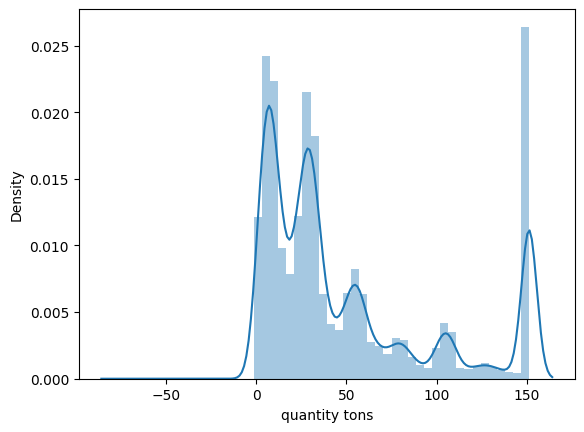

C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\2094203377.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['country'])


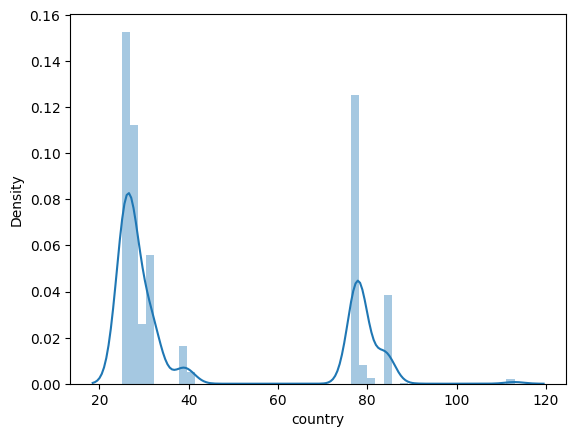

C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\2094203377.py:12: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['application'])


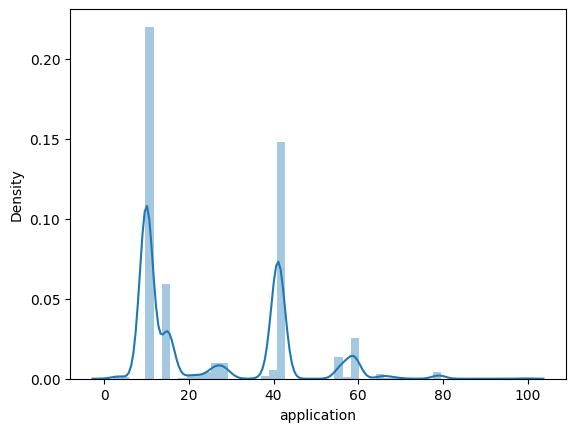

C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\2094203377.py:14: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['thickness'])


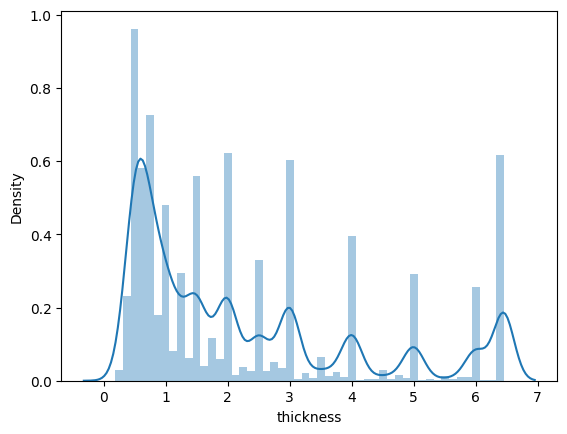

C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\2094203377.py:16: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['width'])


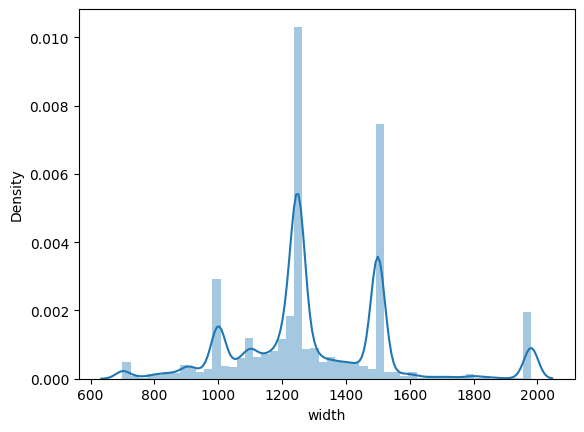

C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\2094203377.py:18: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['selling_price'])


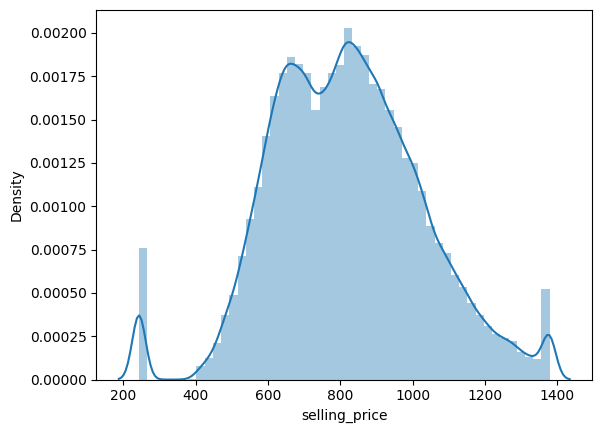

In [16]:
df1['quantity tons']
df1['country']
df1['application']
df1['thickness']
df1['width']
df1['selling_price']

sns.distplot(df1['quantity tons'])
plt.show()
sns.distplot(df1['country'])
plt.show()
sns.distplot(df1['application'])
plt.show()
sns.distplot(df1['thickness'])
plt.show()
sns.distplot(df1['width'])
plt.show()
sns.distplot(df1['selling_price'])
plt.show()

In [17]:
mask1 = df1['selling_price'] <= 0
print(mask1.sum())
df1.loc[mask1, 'selling_price'] = np.nan

mask1 = df1['quantity tons'] <= 0
print(mask1.sum())
df1.loc[mask1, 'quantity tons'] = np.nan

mask1 = df1['thickness'] <= 0
print(mask1.sum())

0
4
0


C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\3202432105.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['selling_price_log'])


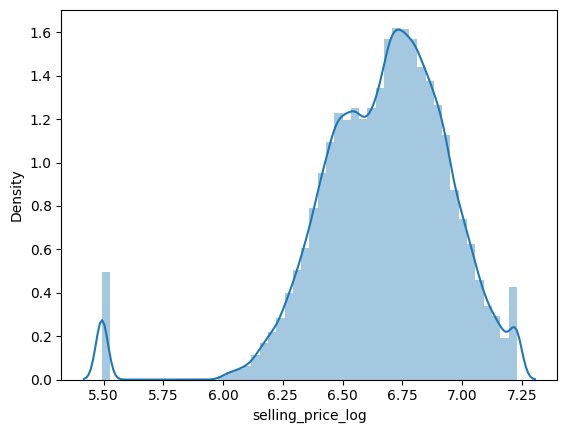

C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\3202432105.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['quantity tons_log'])


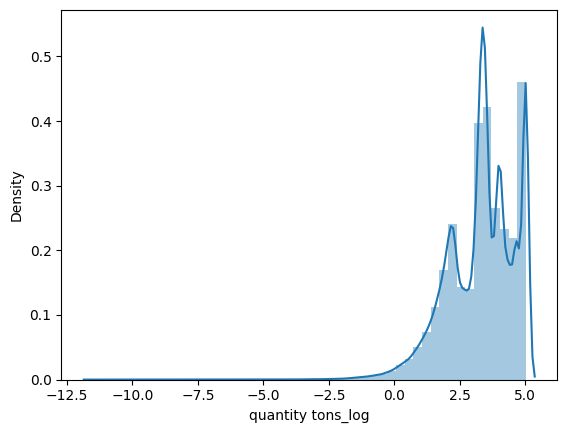

C:\Users\Admin\AppData\Local\Temp\ipykernel_16012\3202432105.py:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['thickness_log'])


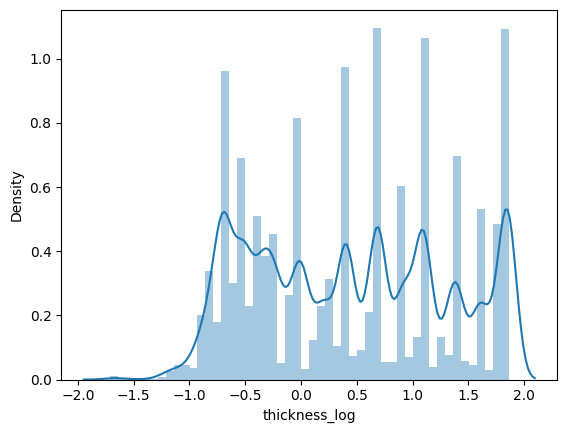

In [18]:
df1['selling_price_log'] = np.log(df1['selling_price'])
sns.distplot(df1['selling_price_log'])
plt.show()

df1['quantity tons_log'] = np.log(df1['quantity tons'])
sns.distplot(df1['quantity tons_log'])
plt.show()

df1['thickness_log'] = np.log(df1['thickness'])
sns.distplot(df1['thickness_log'])
plt.show()

In [19]:
x=df1[['quantity tons_log','application','thickness_log','width','selling_price_log','country','customer','product_ref']].corr()

<Axes: >

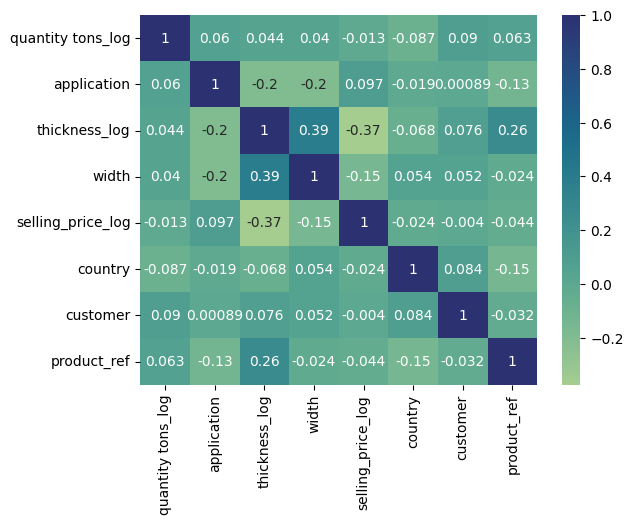

In [20]:
sns.heatmap(x, annot=True, cmap="crest")

In [21]:
col = ['selling_price','quantity tons','width','thickness']
for i in col:
  print(df[i].skew(),'Positive Skew' if df[i].skew()>0 else 'Negative Skew')

0.1379905173088271 Positive Skew
1.1216453837600846 Positive Skew
0.667955924903822 Positive Skew
1.0613929114889356 Positive Skew


In [22]:
df.columns

Index(['quantity tons', 'customer', 'country', 'status', 'item type',
       'application', 'thickness', 'width', 'product_ref', 'selling_price',
       'no_of_days'],
      dtype='object')

In [23]:
df["status"]= df["status"].map({'Won':1, 'Draft':2, 'To be approved':3, 'Lost':0, 'Not lost for AM':4,
                                'Wonderful':5, 'Revised':6, 'Offered':7, 'Offerable':8})

In [24]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['status'])
df['status']=le.transform(df['status'])

In [25]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['item type'])
df['item type']=le.transform(df['item type'])

In [26]:
import pickle
file_path_status = r'D:\Copper\status_mapped.pkl'
with open(file_path_status, 'wb') as file:
    pickle.dump(df['status'], file)
file_path_item = r'D:\Copper\item_type_label_encoder.pkl'
with open(file_path_item, 'wb') as file:
    pickle.dump(le, file)

In [27]:
from sklearn.model_selection import train_test_split
column = ['quantity tons','customer','country','application','thickness','width','product_ref','status','item type','no_of_days']
x = df[column]
y = df['selling_price']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 7)

In [28]:
x_train.shape,x_test.shape

((136230, 10), (45410, 10))

In [29]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor()
dr.fit(x_train, y_train)
dr.score(x_test, y_test)

0.8416441738672313

In [30]:
from sklearn.model_selection import cross_val_score

for depth in [15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30]:
  dr = DecisionTreeRegressor(max_depth = depth)
  dr.fit(x_train, y_train)
  train_score = dr.score(x_train, y_train)
  cross_val = np.mean(cross_val_score(dr, x_train, y_train, cv = 15))
  print(f"Depth - {depth}, TrainScore: {train_score}, Cross-ValScore: {cross_val}")

In [ ]:
from sklearn.tree import DecisionTreeRegressor
dr = DecisionTreeRegressor(max_depth=18)
dr.fit(x_train, y_train)
dr.score(x_test, y_test)

0.8419293893406512

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfreg = RandomForestRegressor()
rfreg.fit(x_train, y_train)
rfreg.score(x_test, y_test)

0.911544747239696

In [ ]:
import pickle

file_ran_for_reg = r'D:\Copper\random_forest_regressor.pkl'
with open(file_ran_for_reg, 'wb') as file:
    pickle.dump(rfreg, file)

In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor()
xgbr.fit(x_train, y_train)
xgbr.score(x_test, y_test)

0.8300229851647722

In [ ]:
from xgboost import XGBRegressor

for lamb in [0,0.5,1,1.5]:
  xgbr = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(xgbr, x_train, y_train, cv = 15))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0, Cross-Val Score: -0.00016274481490679744
Lambda: 0.5, Cross-Val Score: 0.8491681123899839
Lambda: 1, Cross-Val Score: 0.8408306482867758
Lambda: 1.5, Cross-Val Score: 0.7761698177482944


In [ ]:
from xgboost import XGBRegressor

for lamb in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  xgbr = XGBRegressor(learning_rate = lamb)
  cross_score = np.mean(cross_val_score(xgbr, x_train, y_train, cv = 10))
  print(f"Lambda: {lamb}, Cross-Val Score: {cross_score}")

Lambda: 0.1, Cross-Val Score: 0.7746433574993958
Lambda: 0.2, Cross-Val Score: 0.8100435423095019
Lambda: 0.3, Cross-Val Score: 0.8308478151962166
Lambda: 0.4, Cross-Val Score: 0.8406002911941928
Lambda: 0.5, Cross-Val Score: 0.8495300396917788
Lambda: 0.6, Cross-Val Score: 0.8528787182378992
Lambda: 0.7, Cross-Val Score: 0.8522264318807732
Lambda: 0.8, Cross-Val Score: 0.8494468249927583
Lambda: 0.9, Cross-Val Score: 0.8449663742565958
Lambda: 1, Cross-Val Score: 0.8405872961625912


In [ ]:
from xgboost import XGBRegressor
xgbr = XGBRegressor(learning_rate = 0.7)
xgbr.fit(x_train, y_train)
xgbr.score(x_test, y_test)

0.8550709534929685

In [ ]:
df= df[df['status'].isin([1,0])]

In [ ]:
df.shape

(150442, 11)

In [ ]:
df['status'].value_counts()/df.shape[0]

status
1    0.771121
0    0.228879
Name: count, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(['status'], axis = 1)
y = df['status']
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25 , random_state = 7)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['status'])
df['status']=le.transform(df['status'])

In [ ]:
from imblearn.combine import SMOTEENN
cc = SMOTEENN(random_state=7)

x_train_smoteenn, y_train_smoteenn = cc.fit_resample(x_train, y_train)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

model = DecisionTreeClassifier()
model.fit(x_train_smoteenn,y_train_smoteenn)

f1_score(y_test,model.predict(x_test))

0.9562230556237076

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier()
rf.fit(x_train_smoteenn,y_train_smoteenn)

f1_score(y_test,rf.predict(x_test))

0.9625936913057979

In [ ]:
import pickle

class_file = r'D:\Copper\random_forest_classifier.pkl'
with open (class_file,'wb') as file:
  pickle.dump(rf,file)

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier()
xg.fit(x_train_smoteenn,y_train_smoteenn)
f1_score (y_test,xg.predict(x_test))

0.9337358005286848

In [ ]:
from xgboost import XGBClassifier

for lam in [0,0.5,1,1.5]:
  xgbr = XGBClassifier(learning_rate = lam)
  cross_score = np.mean(cross_val_score(xgbr, x_train, y_train, cv = 15))
  print(f"Lambda: {lam}, Cross-Val Score: {cross_score}")

Lambda: 0, Cross-Val Score: 0.7701075065270898
Lambda: 0.5, Cross-Val Score: 0.9371981275796617
Lambda: 1, Cross-Val Score: 0.9426930540722711
Lambda: 1.5, Cross-Val Score: 0.908961636381627


In [ ]:
from xgboost import XGBClassifier

for lam in [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
  xgbr = XGBClassifier(learning_rate = lam)
  cross_score = np.mean(cross_val_score(xgbr, x_train, y_train, cv = 10))
  print(f"Lambda: {lam}, Cross-Val Score: {cross_score}")

Lambda: 0.1, Cross-Val Score: 0.8863433239888112
Lambda: 0.2, Cross-Val Score: 0.9112300291589431
Lambda: 0.3, Cross-Val Score: 0.9246749555905065
Lambda: 0.4, Cross-Val Score: 0.9327135223934722
Lambda: 0.5, Cross-Val Score: 0.9373399130481582
Lambda: 0.6, Cross-Val Score: 0.9400607923324085
Lambda: 0.7, Cross-Val Score: 0.9413636184699129
Lambda: 0.8, Cross-Val Score: 0.942781667689465
Lambda: 0.9, Cross-Val Score: 0.9421612739540366
Lambda: 1, Cross-Val Score: 0.9414256704890201


In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(learning_rate = 1.1)
xg.fit(x_train_smoteenn, y_train_smoteenn)
f1_score(y_test, xg.predict(x_test))

0.9538629250624187